### Introduction

This notebook is an experiment of building a model that will predict if a rookie player will last at least 5 years in the league based on his stats.

In the National Basketball Association (NBA), a rookie is any player who has never played a game in the NBA until that year. At the end of the season the NBA awards the best rookie with the NBA Rookie of the Year Award.

Moving to the NBA league is a big deal for any basketball player. Sport commentators and fans are very excited to follow the start of their careers and guess how they will perform in the future.

In this experiment, K-nearest Neighbors model is used.



### Import the libraries

In [26]:
import pandas as pd
import numpy as np

import os
import sys
sys.path.append(os.path.abspath('..'))
from src.common_lib import DataReader, NBARawData
from src.models.aj_metrics import confusion_matrix, plot_roc

from sklearn.ensemble import AdaBoostClassifier
from src.models.aj_metrics import confusion_matrix, plot_roc, visualise_accuray
from joblib import dump

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load the data

In [27]:
# Instantiate the custom data reader class
data_reader = DataReader()

# Load Raw Train Data
train_df = data_reader.read_data(NBARawData.TRAIN)

# Load Test Raw Data
test_df = data_reader.read_data(NBARawData.TEST)

### Removed Id Columns , Split the RawData and Build the KNeighbors Model

In [28]:
exp_df = train_df.copy()
target = exp_df['TARGET_5Yrs']
exp_df = exp_df.drop(['Id_old', 'Id'], axis = 1)

X_train, X_val, y_train, y_val = data_reader.split_data(train_df)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

### Make Prediction on Training Dataset and Evaluate the Accuracy

Accuracy Score: 0.8559375


,pred:0,pred:1
true:0,1074,0
true:1,922,4404


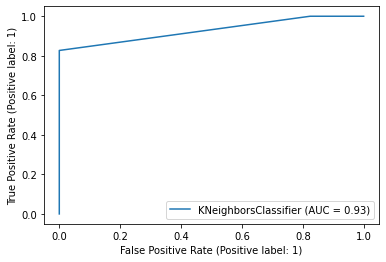

In [29]:
y_pred = neigh.predict(X_train)

visualise_accuray(neigh, X_train, y_train, y_pred)
confusion_matrix(y_train, y_pred)

### Make Prediction on Validation Dataset and Evaluate the Accuracy

Accuracy Score: 0.621875


,pred:0,pred:1
true:0,77,180
true:1,425,918


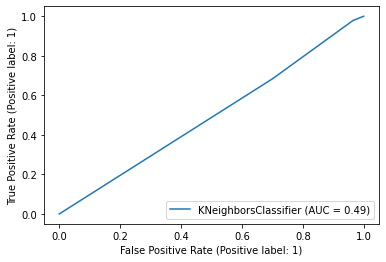

In [25]:
y_pred = neigh.predict(X_val)

visualise_accuray(neigh, X_val, y_val, y_pred)
confusion_matrix(y_val, y_pred)

In [22]:
y_pred = knn.predict(exp_df)
cm = confusion_matrix(target, y_pred)
cm

,pred:0,pred:1
true:0,1331,0
true:1,986,5683


In [13]:
y_test_proba =neigh.predict(test_df)
y_test_proba

final_prediction_test = pd.DataFrame({'Id': range(0,3799), 'TARGET_5Yrs': [p for p in y_test_proba]})
final_prediction_test['TARGET_5Yrs'].value_counts()
#final_prediction_test.to_csv("../reports/tin_submission_knearest.csv", index=False)

final_prediction_test.head(10)

,Id,TARGET_5Yrs
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1
